## **SOLID the good, the bad & the ugly**
I need to start with a confession, I am not a fan of the OO-paradigm. I find objected-oriented programming & design often wieldy, overly verbose, and that most perceived benefits are easily achieved in other paradigms. If we see an object as module with a public interface, then modular programming, code reuse and information hiding are achieved in pretty much all modern languages.

I perceive object-oriented programming to have two distinct advantages:
 1. The object-oriented paradigm makes it easy to model real world phenomena.
 2. The object-oriented paradigm is well structured.
    
Where I find the OO-model to be well structured, I would argue that SOLID makes it seriously over structured. So serious in fact that it becomes nearly impossible to grasp what is going on in the code (yes this applies to GRASP too :-) ). But I should probably stop essaying and tell you what SOLID is first. SOLID is an acronym for five design principles intended to make object-oriented designs more understandable, flexible, and maintainable (see https://en.wikipedia.org/wiki/SOLID). Brought together by Bob Martin aka Uncle Bob in the nineties to stop something he called software rot (see http://butunclebob.com/ArticleS.UncleBob.PrinciplesOfOod).   

The principles themselves are not the brainchildren of Bob Martin (as I am sure he would acknowledge straightaway), but of truly eminent computer scientist as, Betrand Meyer, Edsger Dijkstra, Barbera Liskov, and others. The ideas that are brought together in SOLID originated in the sixties, seventies, and eighties in a time where computer programming was in its infancy.  

This leads to a question, are a lot of these ideas still valid. Is style of programming that Bob Martin champions still applicable within a programming world where JavaScript is probably the most used language, closely followed by Python. Both languages without a strong static type system! When SOLID was written the most used language would surely have been C, followed by Pascal and C++ with Java at the ascent. Nowadays you can question if anybody outside of the systems programming world still programs in C/C++. With other words is application development still done with those languages? You could even wonder if with advent of Rust you still program systems with C/C++? How does agility function with SOLID? I mean in his book on GRASP, Larman (Applying UML and Patterns: An Introduction to Object-Oriented Analysis and Design and the Unified Process) uses the unified process, which I think most people would suggest is not that agile. All questions that I feel are justified to ask, but I will not endeavour to answer here, but they have, I would suggest, a profound impact on SOLID. 

In this notebook however, I just want to focus on Python and the implementation of the SOLID principles for Python. I want to investigate what is useful and what is not. I want you to be able to understand SOLID and question it. I do this with a title inspired by Betrand Meyer, who authored a book on Agile, called Agile, the good, the bad, and the ugly. 

Let me start off with the good in SOLID.


#### **The single responsibility principle (S)**
The single responsibility principle (SRP for short) leads to a lot of confusion (mostly thanks to Uncle Bob who is often far from rigorous in his definitions, unlike the people he borrows his ideas from). For unlike what is often thought, SRP is not about having your classes and functions having only one single responsibility! 

It means that the responsibility of changing a module (class) lies with one actor. Bob Martin rewords this principle as: Gather together the things that change for the same reasons. Separate those things that change for distinct reasons, see https://blog.cleancoder.com/uncle-bob/2014/05/08/SingleReponsibilityPrinciple.html. This is a much older idea as Bob Martin rightfully suggest. It comes from Edsger Dijkstra who wrote about separation of concerns in his paper on scientific thought (https://www.cs.utexas.edu/users/EWD/transcriptions/EWD04xx/EWD447.html) In other words, we look at the core responsibilities of a class and separate out the none core, after we have done that, we limit access to that class to the only actor (most of the times another class) that has the responsibility to change that class. Both should ideally happen to make it single responsibility.

To understand this requires an example, first one, not adhering to single responsibility, then we make it adhere.   

As SOLID is al about design we start with a UML diagram    

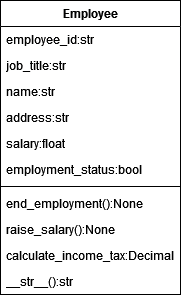



In [ ]:
from dataclasses import dataclass
from datetime import date

@dataclass
class Employee:
    '''I am going to keep the program examples simple they are not meant to be perfect, but to show you the point'''
    employee_id:str
    job_title:str
    name:str
    salary:float=0.0
    employment_status:bool=True
    
    def end_employment(self)->None:
        self.employment_status = False
        
    def raise_salary(self, percentage)->bool:
        self.salary *= (1+percentage)        
    
    def calculate_income_tax(self)->float:
        # todo include logic for calculating income tax
        pass
    
    def __str__(self)->str:
        return f'{type(self).__name__}`s name is {self.name}, he is our {self.job_title}.'

In [ ]:
croc = Employee(employee_id='Croc1', job_title='Chief Snacking Officer', name='Croc', salary=85250)
croc

In [ ]:
print(croc)

We have our employee, the variables define the employee, 
they make it unique. At minimal we could expect employee_id to be unique and therefore the whole object is unique.

However now we should start thinking about the methods that are defined for this employee. Are they unique, are they there for every employee? Should employee have these at all. We go back to Bob Martin: Gather together the things that change for the same reasons. Separate those things that change for distinct reasons.: 
 1. Who changes the employment status? 
 2. who raises salary? 
 3. who calculates income tax? 
 4. who tells about the employee?    
 
 The answers are:
 1. The human resources department.
 2. ditto. 
 3. The financial department.
 4. Employee itself.

We need to separate the first three concerns. Also, we should stop for a second, and consider who creates an employee. Fairly obvious but, this should not be the Employee class itself. We need at minimal create a class responsible for our employee object.

In [ ]:
from dataclasses import dataclass, field
from typing import ClassVar

@dataclass
class Employee:
    employee_id:str
    job_title:str
    name:str
    salary:float=0.0
    employment_status:bool=True
    
    def __str__(self)->str:
        return f'{type(self).__name__}`s name is {self.name}, he is our {self.job_title}.'
    
@dataclass    
class HRMEmployee: 
    employees:list[str] = field(default_factory = list)
    
    def create_employee(self, employee_id:str, job_title:str, name:str, salary:float)->Employee:
        '''method to create and store an employee'''
        employee = Employee(employee_id=employee_id, job_title=job_title, name=name, salary=salary) 
        self.employees.append(employee)
        return employee
    
    def end_employment(self, employee:Employee)->None:
        if employee in self.employees:
            employee.employment_status = False
            employee.end_employment_date = date.now()
        else:
            print('Employee is unknown')
                       
    def raise_salary(self, employee:Employee, percentage:float)->None:
        if employee in self.employees:
            employee.salary *= (1+percentage)
        else:
            print('Employee is unknown')

@dataclass        
class FinTaxEmployee:
    
    taxrate:ClassVar[float]=0.41
    
    def calculate_income_tax(self, salary:float)->float:
        return salary*self.taxrate

In [ ]:
croc = HRMEmployee().create_employee(employee_id='Croc1', job_title='Chief Snacking Officer', name='Croc', salary=85250)
croc

In [ ]:
print(croc)

In [ ]:
FinTaxEmployee().calculate_income_tax(croc.salary)

This is single responsibility principle in optima forma.
We have separated out the different concerns to the different actors that are responsible for those concerns. 

HRMEmployee is responsible for change of Employee. Employee is only tasked with methods the Employee need to execute. which currently is to tell about itself via the `__str__` and `__repr__` special methods (only the former is explicitly programmed, the latter comes from the dataclass decorator).   

Let's look at a diagram of this:

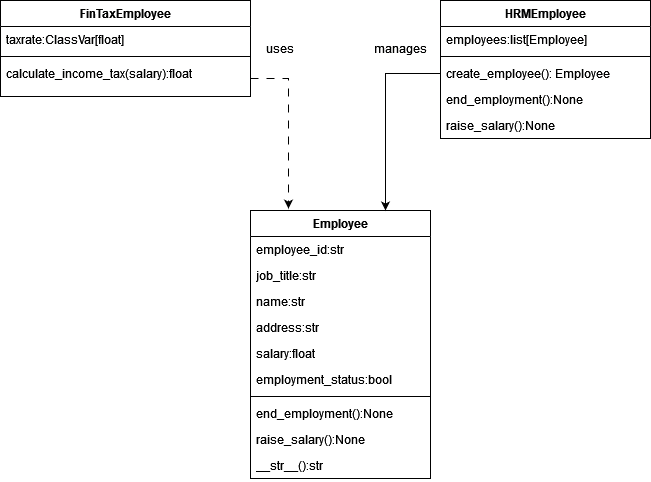    

My UML is shoddy at best you get the point




#### **high cohesion / low coupling**
The single responsibility principle is definitely a good principle. Perhaps the single responsibilty is Bob Martin's attempt to reformulate the software quality principles of high cohesion / low coupling which come from Larry Constatine, from his 1960's work on structured design in programming.   

High cohesion is the degree to which the elements inside a module (class & more) belong together, it is a measure of the strength of relationship between the methods and data of a class and some unifying purpose or concept served by that class. (See https://en.wikipedia.org/wiki/Cohesion_(computer_science) for the complete definition)

Let see an example first of low cohesion  

In [ ]:
from dataclasses import dataclass

@dataclass
class User:
    name:str 
    email_address:str
    
    def get_user(self)->str:
        return self.name
    
    def set_user(self, name:str)->None:
        self.name = name

    def get_email_addess(self)->str:
        return self.email
    
    def set_email_address(self, email_address:str)->None:
        self.email_adress = email_address
        
    def validate_email_address(self, email_address:str)->bool:
        return self.email_address==email_address
    
    def send_email(self)->str:
        return 'bye bye'  

As a (email) user you may store an email, but user should not validate or send emails. These are jobs for an Email class    

Here is a high cohension version.

In [ ]:
from dataclasses import dataclass

@dataclass
class EmailUser:
    name:str 
    email_adress:str
    
    def get_user(self)->str:
        return self.name
    
    def set_user(self, name:str)->None:
        self.name = name

    def get_email(self)->str:
        return self.email_adress
    
    def set_email(self, email_address:str)->None:
        self.email_address = email_address

This class has high cohesion and adheres to the first part of the single responsibility.    

Classes with a single, well-defined purpose are easy to understand and much more readable. The name of a class should convey the use of such a class, there are many distinct types of users possible, EmailUser narrows that down to one. EmailUser is here to store data about the user. Email is there to send email and check the validity of an email address.

High Cohesion has specific advantages:
 1. code is clearer, less cluttered.
 2. code is easier to change (if you want that, which you should consider carefully).
 3. code is easier to test.

#### **Immutability in data**
We should have a good long look at our second "good" class. The class User has two traits, it has a name and an email address. Should we want that name to change, should we want that email address to change. I think the answer is no for both questions. Better create a new object and delete this one instead of changing it.    

One of the main reasons that OO-programs contain more bugs than functional programs is that functional programs treat their data as immutable. For instance in Haskell if you remove an element from a list, the compiler actually creates a new list, with all but the one element removed from the previous list. Order is of course preserved. Many bugs in objected-oriented programming come from changing objects to have different values. 

In Python (with dataclasses) we can make these traits resistant to change, we can freeze them.

In [ ]:
from dataclasses import dataclass

@dataclass(frozen=True)
class EmailUser:
    name:str 
    email_address:str
    
    def get_user(self)->str:
        return self.name
    
    def get_email(self)->str:
        return self.email_address
    

In [ ]:
user = EmailUser(name='Croc',email_address='croc@peckish.com')
user

In [ ]:
user.get_user()

In [ ]:
user.get_email()

In [ ]:
user.email_address = 'snacky@blueheron.com'

**Immutability increases testability**    

The importance of immutable data lies in that there are simply less bugs in immutable data. If you can't change an attribute, you can't change it to an easy breakable type. For instance, you have a programmer that needs the EmailUser object croc to have an email address croc@peckish.com, and it finds snacky@blueheron.com, the program crashes. (Of course, this kind of dependency should always be avoided, yet it is still found)   

Immutability allows you to reason about the program with much confidence, you know  a particular object won't have changed since creation. This allows you to test easier. In general, the order in which you can test things from easy to difficult are:
 1. a pure (mathematical) function, meaning no side effects.
 2. A class that has immutable state.
 3. A class that has mutable state but has no dependencies with behaviour (not depending on other objects).
 4. A class that operates against a dependency with its own behaviours.
 
It is better to create a new object instead of changing it!

Have a look at another example of High Cohesion a good one and a bad one.   

Think about a class Book, a book has a title, a title would be a string, a book has an author and perhaps authors, we would need a list of string, finally a book has text, which is again a string. A book is an inanimate object, once the book is done it cannot change (except for some underlining and scribbling in the side lines perhaps) until you print a second edition. In this case it makes sense to make it frozen.

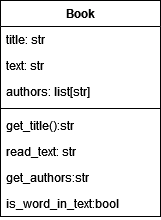

In [ ]:
from dataclasses import dataclass, field

@dataclass(frozen=True)
class Book:
    title:str
    text:str
    authors:list[str]= field(default_factory=list) 
    
    def get_title(self)->str:
        return self.title
    
    def read_text(self):
        return self.text
    
    def get_authors(self)->str:
        result = ''
        for author in self.authors:
            result = result + author + ' '
        return result
    
    def is_word_in_text(self, word:str)->bool:
        return word in self.text
    

Let's create a book

In [ ]:
fpy = Book(title='Fluent in Python', text='use the tools Python offers you!', authors=['Luciano Ramalho'])
fpy

In [ ]:
print(fpy.get_authors())

In [ ]:
fpy.is_word_in_text('tools')

Now we add a print function to it, a function to print to the console

In [ ]:
from dataclasses import dataclass, field

@dataclass(frozen=True)
class BadBook:
    title:str
    text:str
    authors:list[str]= field(default_factory=list) 
    
    def get_title(self)->str:
        return title
    
    def read_text(self):
        return text
    
    def get_authors(self)->str:
        result = ''
        for author in self.authors:
            result = result + author + ' '
        return result
    
    def is_word_in_text(self, word:str)->bool:
        return word in self.text
    
    def print_to_console(self):
        pass 

Let's think about this, is printing an operation that belongs to books?    

No it isn't. This is the responsibility of different class let's call it the BookPrinter class

In [ ]:
from dataclasses import dataclass

@dataclass
class BookPrinter:
    
    def print_to_console(self, text:str)->None:
        print(text)
        
    def print_to_file(self,name:str, text:str, path:str)->None:
        with open(f'{name}.txt', path) as f:
            f.write(text)

In [ ]:
bp = BookPrinter()
bp.print_to_console(fpy.read_text())

This class adheres to SRP and High Cohesion.     

I want you to notice how I implemented another print function. By using high cohesion, the classes have single responsibility, and I can easily expand the class with more functionality as I did in BookPrinter. We are open to extension.

#### **Low coupling** 
As stated, the OO-model causes dependencies. some of these dependencies are wanted. For instance, we want to use that library in our code. Other dependencies such as the dependency of a class on another class we want to avoid as much as possible. We call this type of dependency coupling. Coupling is the degree of interdependence (dependencies) between classes (modules). 

Coupling is all about how much change you will have to do in one class if there is a change in another class. Let's look at bad and a good example, consider our BookPrinter. Let's add an attribute book to it.


In [ ]:
from dataclasses import dataclass

@dataclass
class BadBookPrinter:
    path:str
    book:Book=None
    
    def print_to_console(self)->None:
        print(self.book.read_text())
        
    def print_to_file(self)->None:
        with open(f'{self.book.get_title()}.txt', self.path) as f:
            f.write(self.book.get_text())

In [ ]:
badprinter = BadBookPrinter(book=fpy, path='')

In [ ]:
badprinter.print_to_console()

The code works, yet this is still bad code, try to answer why this would be bad code.

In [ ]:
from dataclasses import dataclass

@dataclass
class BookPrinter:
    path:str
    title:str
    book_text:str
    
    def print_to_console(self)->None:
        print(self.book_text)
        
    def print_to_file(self)->None:
        with open(f'{self.title}.txt', self.path) as f:
            f.write(self.book_text)

In [ ]:
goodprinter = BookPrinter(path='', title=fpy.title, book_text=fpy.read_text())
goodprinter.print_to_console()

This implementation is good but, why is this class good and the former class bad? 

Remember SOLID is about designing software, not programming. If you wanted to reimplement the Book class which of these two classes is dependent on that book class and which isn't?

A picture says a thousand words:   

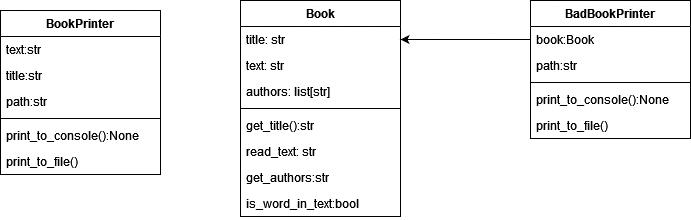

You should try to avoid usage of objects in your classes. In general, I would suggest you should only use objects if you need all their attributes and methods otherwise use simple data types, for instance in BookPrinter we use a string. `book_text` Where in BadBookPrinter we use the entire book object. Thus, giving BadBookPrinter access to other variables and methods this class doesn't use nor need. Now here this is pretty much harmless, but it is easy to envision a class where this not the case. Classes should only receive the information that is need for these classes to function. Of course, this might be an object, but most of the time it is better to use a simple data type like a string or an int. 
  
Also remember that the meaning of SRP is that only one actor has the responsibility to change a class, giving BadBookPrinter access to Book means that potentially BadBookPrinter can change all attributes of Book.
Furthermore, we give BookPrinter access to much more information than it needs to operate. This goes against the OO principle of information hiding, see https://en.wikipedia.org/wiki/Information_hiding.

Loose coupling has two distinct advantages:
 1. tightly coupled classes are difficult to change. As you could see if we want to change our Book class and remove the text attribute, our BadBookPrinter would have to change too.
 2. tightly coupled classes are difficult to test. Not only do you need to test the functionality of their classes, but also their interdependencies.


**High quality software shows high cohesion / low coupling!**

#### **The Open/Closed principle** (O) 
The open close principle is the idea that we should be able to expand a class without changing the code of that class. The obvious way to do this by a form of inheritance. There are then also two forms of the open/closed principle:
 1. Meyer OCP: where a class inherits from another class with implementations
 2. Polymorphic OCP: the use of interface/ABC (abstract base classes) to implement inheritance.    
 
Although Betrand Meyer invented OCP (He is a better guru than uncle Bob) you shouldn't use the Meyer OCP because you end up creating unnecessary child/parent relationships.    

Let's look at a Meyer OCP and how this does not adhere to our quality principle of low coupling.


In [ ]:
from dataclasses import dataclass

@dataclass
class Guitar:
    make:str
    model:str
    strings:int=6
    
    def get_make(self)->str:
        return self.make
    
    def get_model(self)->str:
        return self.model 
    
    def play(self)->str:
        return f' my {self.strings} strings are singing'
    

In [ ]:
tod = Guitar(make='Ibanez', model='tod10')
tod.play()

Now we want to expand the class with some flames on it. However if we expand our guitar class we might have problems, 
all guitars of this class now have potentially a flame. 

In reality of course changing the Guitar class could create a host of problems in our code somewhere else. So we extend guitar with FlamedGuitar as per Meyer OCP.

In [ ]:
@dataclass
class FlamedGuitar(Guitar):
    flame_colour:str='Red'
    
    def get_colour(self)->str:
        return f'this guitar has an excellent {self.flame_colour} coloured flame '
    

This class can do anything that guitar can do and more.  

In [ ]:
gib = FlamedGuitar(make='Gibson', model='Les Paul', flame_colour='Purple')
gib.play()

In [ ]:
gib.get_colour()

In [ ]:
gib.__dict__

Only now we are completely dependent on Guitar and this code is easy to break, especially in Python.

In [ ]:
class FlamedGuitar(Guitar):
    
    def __init__(self, strings:int=12, flame_colour:str='Red'):
        self.strings       = strings
        self.flame_coulour = flame_colour
    
    
    def get_colour(self)->str:
        return f'this guitar has an excellent {self.flame_colour} coloured flame '

In [ ]:
fender = FlamedGuitar()

In [ ]:
fender.get_model()

Though we can access the `get_model` method from guitar, the FlamedGuitar class has no attribute called model.   

When we created our own init, we also overwrote our instance variable `__dict__`

In [ ]:
fender.__dict__

#### **MRO**
What if we want Guitar to be twelve stringed? Of course, you would say Guitar should not change. 

However, should not, is not would not, is not will not. Reality is that code changes. If for whatever reason, maybe we found a bug, we need to change Guitar now we will have to check all the subclasses of guitar and down the MRO graph to see if or code still works. You should design your code ready for change and that mean truly little dependencies!

MRO is Pythons method resolution order, which is basically a directed acyclic graph (affectionally known as a DAG). See https://docs.python.org/3/glossary.html#term-method-resolution-order The method resolution shows the inheritance hierarchy. More on this in the inheritance notebook.


#### **Polymorphic OCP**
Luckily we have the polymorphic open/closed principle

(Bob Martin's paper on the matter https://web.archive.org/web/20060822033314/http://www.objectmentor.com/resources/articles/ocp.pdf if you are not familar with C++, a struct is the C++ version of a class.) 

In [ ]:

class GuitarInterface:
    '''This is an implicit interface in Python'''
    make:str
    model:str
    strings:int
    
    def get_make(self):
        pass
    
    def get_model(self):
        pass
    
    def play(self):
        pass
    
@dataclass
class AccousticGuitar(GuitarInterface):
    make:str
    model:str
    strings:int
    sound_hole:bool=True
    
    def get_make(self)->str:
        return self.make
    
    def get_model(self)->str:
        return self.model
    
    def play(self)->str:
        return f'my {self.strings} strings are singing.'
    
    def hollow(self)->bool:
        return self.sound_hole

@dataclass    
class ElectricGuitar(GuitarInterface):
    make:str
    model:str
    strings:int
    sound_hole:bool=False
    
    def get_make(self)->str:
        return self.make
    
    def get_model(self)->str:
        return self.model
    
    def play(self)->str:
        return f'my {self.strings} strings are howling.'
    
    def hollow(self)->bool:
        return self.sound_hole

In [ ]:
ibz = ElectricGuitar(make='Ibanez', model='har10', strings=6)
ibz

In [ ]:
fen = AccousticGuitar(make='Fender', model='Accoustic', strings=6)
fen 

In [ ]:
fen.get_make()

In [ ]:
ibz.play()

In [ ]:
fen.play()

As we can see we have two extensions of the guitar class, there are no dependencies between these classes. 

The GuitarInterface class functions as a blueprint. Now our implementation is high cohesion / low coupling. Of course, we could now implement our FlamedGuitar, however this isn't a very clever idea. Consider the diagram below.

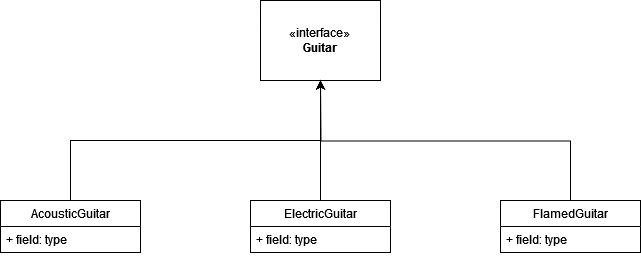

Now answer the question how would you expand this diagram if you want an electric and an acoustic FlamedGuitar? You must either create a connection between FlamedGuitar and ElectricGuitar and AcousticGuitar or make two subclasses for FlamedGuitar. The first option would create added coupling, which we want to avoid. The second added dependency, needless code repetition and cluttering, which of course we also want to avoid.

I found this example on a very reputable website and think it is a bad example as you might have guessed. The website uses Java to explain the Open/Closed concept and Java is not Python. But it is still a strange concept, flames on your guitar I would suggest is not enough of a trait for the guitar to warrant a subclass. If the flame will fade it still will be a guitar and no less of guitar at that. 

Flamed should be either an attribute or, and this is the Python way, be a non-Guitar class that is implemented by a Guitar subclass. In Python this is called a Mixin class, the Mixin class holds the attributes and operations, the Guitar class will just implement the Mixin class. It is not the idea that the child reimplements the methods of the Mixin class, it is outside behaviour it doesn't belong to the class! 

Of course, this is possible because Python knows multi-inheritance, Java does not. Still, nobody uses Java like the websites example, you would use object composition or in a pinch an abstract class (which is not completely the same in Java as it is in Python).


#### **Mixin Class**
A mixin is a class that contains methods for use by other classes. Methods that are innately alien to other classes. As for instance drawings and colours are for our guitar class. Where mixins where intended not to have an inheritance relationship, in Python they are intended as such. Python knows multiple inheritance. 

See https://en.wikipedia.org/wiki/Mixin for more details.
 

In [ ]:

class GuitarInterface:
    '''This is an implicit interface in Python'''
    make:str
    model:str
    strings:int
    
    def get_make(self):
        pass
    
    def get_model(self):
        pass
    
    def play(self):
        pass

class MixinGuitarDrawing:
    
    def create_drawing(self,drawing, drawing_colour)->None:
        self.drawing=drawing
        self.drawing_colour=drawing_colour
    
    def show_drawing(self)->str:
        return f'{type(self).__name__} has wonderful {self.drawing} shape that is a great {self.drawing_colour} colour.'
    
    
@dataclass
class AccousticGuitar(GuitarInterface, MixinGuitarDrawing):
    make:str
    model:str
    strings:int
    drawing:str=None
    drawing_colour=None
    sound_hole:bool=True
    
    def get_make(self)->str:
        return self.make
    
    def get_model(self)->str:
        return self.model
    
    def play(self)->str:
        return f'my {self.strings} strings are singing.'
    
    def hollow(self)->bool:
        return self.sound_hole
    
    def create_drawing(self, drawing, drawing_colour)->None:
        super().create_drawing(drawing, drawing_colour)
        
    def show_drawing(self)->str:
        return super().show_drawing()
        
        

@dataclass    
class ElectricGuitar(GuitarInterface, MixinGuitarDrawing):
    make:str
    model:str
    strings:int
    sound_hole:bool=False
    drawing:str=None
    drawing_colour=None

    
    def get_make(self)->str:
        return self.make
    
    def get_model(self)->str:
        return self.model
    
    def play(self)->str:
        return f'my {self.strings} strings are howling.'
    
    def hollow(self)->bool:
        return self.sound_hole
    
    def create_drawing(self, drawing, drawing_colour)->None:
        super().create_drawing(drawing, drawing_colour)
        
    def show_drawing(self)->str:
        return super().show_drawing()

In [ ]:
fen = AccousticGuitar(make='Fender', model='Accoustic', strings=6)
fen

In [ ]:
fen.create_drawing(drawing='Flame', drawing_colour='purple')

In [ ]:
fen.show_drawing()

In [ ]:
ibz = ElectricGuitar(make='Ibanez', model='satriani', strings=6)

In [ ]:
ibz.create_drawing(drawing='lightning', drawing_colour='yellow')
ibz.show_drawing()

A Mixin class gives outside behaviour to a class, obviously drawings are not essential for a guitar.    

The Python diagram would look like this.   

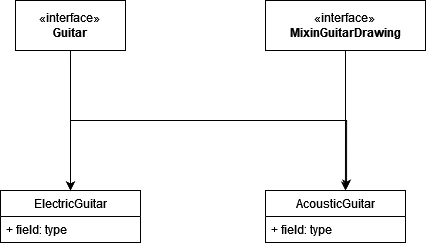

#### **The Liskov substitution principle** (L)
The Liskov principle is about types not about classes, being about types it is about type hierarchy, and not about inheritance don't confuse this. Much of the confusion concerning Liskov and Python is about types.    

Formally the Liskov Substitution Principle states; if S subtypes T, what holds for T-objects holds for S-objects.

I realize that this is a bit opaque. Let me try to say it simple. The LSP states that if class S is a subtype of class T, then we should be able to use an instance of type S where type T is expected. 

Mathematically we express this simply as if $S\le T$ then I can use type S where I expect type T. 

This will become a lot clearer with a piece of code.


In [ ]:
from abc import ABC, abstractmethod
from dataclasses import dataclass

class CurrencyConverter(ABC):
    '''This the interface that the client class will use, there are no details here''' 
    
    @abstractmethod
    def convert(self, from_currency, to_currency, amount) -> float:
        raise NotImplementedError("You need to implement this.")


@dataclass
class FXConverter(CurrencyConverter):
    '''this a low level module that implements the conversion in a detailed manner'''
    
    def convert(self, from_currency, to_currency, amount) -> float:
        print(f'using the {type(self).__name__} converter')
        print(f'{amount} {from_currency} = {amount * 1.2} {to_currency}')
        return amount * 1.15


@dataclass
class AlphaConverter(CurrencyConverter):
    '''this a low level module that implements the conversion in a detailed manner'''
    
    def convert(self, from_currency, to_currency, amount) -> float:
        print(f'using the {type(self).__name__} converter')
        print(f'{amount} {from_currency} = {amount * 1.2} {to_currency}')
        return amount * 1.2

@dataclass
class Client:
    '''here we find the Liskov example'''
    converter:CurrencyConverter=None

    def start(self):
        self.converter.convert('EUR', 'USD', 100)

In [ ]:
client = Client(converter=FXConverter())
client.start()

To understand what happens see the following diagram   

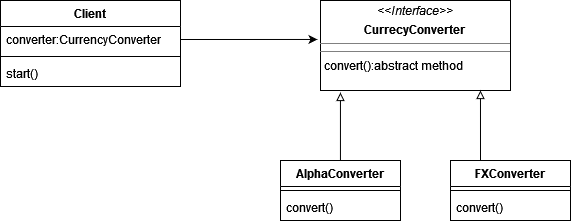

The client has an attribute called converter of type CurrencyConverter.

CurrencyConverter is an abstract base class. The only way you can subtype in Python is via the abstract base class. The abstract base class CurrencyConverter has type CurrencyConverter.

Both AlpaConverter and FXConverter implement that interface and are thus subtypes of CurrencyConverter.

In the class `Client` I have an attribute `converter` which is of type `CurrencyConverter`. However, when I instantiate the Client class `client = Client(converter=FXConverter())` I do this with an FXConverter. FXConverter is different type than the class expect, I expect a CurrencyConverter. This is possible because FXConverter $\le$ CurrencyConverter. FXConverter is a subtype of CurrencyConverter. There is not more to Liskov.

All code below  on the LSP is facultative, it explains Liskov in more depth, but in Python Liskov is really of no consequence as Python is dynamically typed language, where I can't nominate to be of type, instead the interpreter interprets that. Python then also doesn't know a method to check for subtypes.

#### The Liskov Substiution Principle (LSP) explained
To know the actual Liskov substitution principle, you need to know a few things:
 1. Polymorphism
 2. Typing
 3. Subtyping
 4. Why subtyping is not the same as subclassing
 5. DuckTyping

We could start at point 5 and state that the Liskov Principle requires nomitative typing. Nominal typing means that two variables are type-compatible if and only if their declarations name the same type. Python does not do nominative typing but DuckTyping (after the duck test) and that is the end of Liskov. I won't do that.

Many Pythonistas confuse (inclusion) polymorphism, the provision of a single interface to entities of different types, with Liskov. What they want to see if you need to implement Liskov, is basically an interfac. In Python an interface is an abstract base class with only abstract methods. The latter is important because you cannot guarantee type otherwise.  

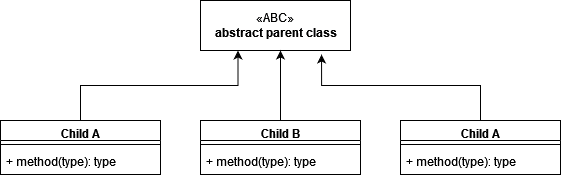

All the below examples follow this pattern and are Python style 'Liskov'


#### **Type & Subtype**

The LSP states if S subtypes T, what holds for T-objects holds for S-objects.

That sentence only makes sense if we know what a subtype is. Before answering what is a subtype let me start with telling you what a subtype isn't, it is not a subclass. Subtyping and inheritance are not the same. In some languages inheritance and subtyping agree, but these are in general static OO languages like Java, Go, and C++. In Python you can't nominate a type and therefore can't guarantee the Liskov principle. 

You could also question the need for the Liskov Principle in general not just Python, the general tendency is to favour object composition over inheritance. Strangely enough my opinion on Python is that it does the opposite, it favours inheritance. 

Before I investigate the subtype, we should first know what a type is:

A type is a set of values, with a set of allowed operations on these values, and/or a representation of these values as machine types.   

For instance {-(n+1) ,-n, ... ,-2,-1,0,1,2,3, ... n, n+1} is the set of values knows as integers, its type is `int`, and addition and subtraction are some of the operations defined for going from int to int. 

a subtype is a datatype that is related to another datatype (the supertype) by some form of substitutability. This definition is from Wikipedia, see https://en.wikipedia.org/wiki/Subtyping. I am not sure I like the last part it seems to me that types and subtypes exist before substitutability. 

I personally find it easiest to explain typing with a bit of category theory:

A type is a category with objects (data) here in capitals, and morphisms (functions) that allow you to go from object to object. 

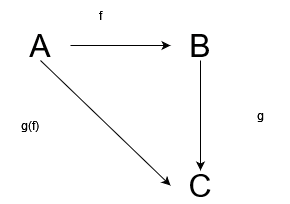

A subtype of type is a category that has at minimum all the objects and morphisms from type, and maybe has objects and morphisms on its own.

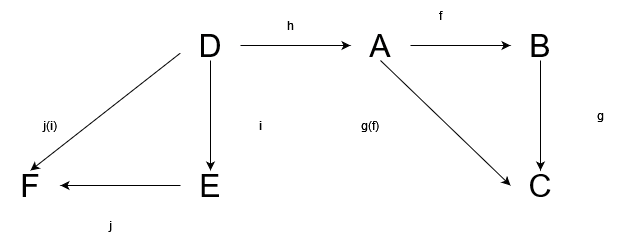

As subtype has all the objects and morphisms of type, you can do all with subtype that you can do with type, there for you can substitute a type or a subtype, for all you would want to do with type, you can do with subtype. As you can see, I can still go from $A \rightarrow  B \rightarrow C$  or from $A \rightarrow C$ in the last category. Now if I do not want to do anything else as: $f,g$ or $g \circ f$ then obviously I can do them in both categories, and can thus substitute S for T, on the condition that I want to do only those morphisms that apply to T.

I in particular do not like $ S \le T$ because yes is S a subtype but subtypes usually seem to be larger in objects and morphisms. I know that the less than equal here is actually a relationship in a type hierarchy, but I find it confusing instead of clear.

In Python type is particularly important not only will it retrieve the type of the object you give to it, type also functions as a class factory you can use it to make classes.


In [ ]:
x = 3
type(x)

In [ ]:
Class = type('Class', (), {'george':'rhino'})
Class

In [ ]:
Class.george

#### **Python type hierarchy**
Python knows a type hierarchy where all types are named and ordered. This is quite important to know if you want to build serious Python programs, with difficult algorithms that depend on sophisticated data structures.

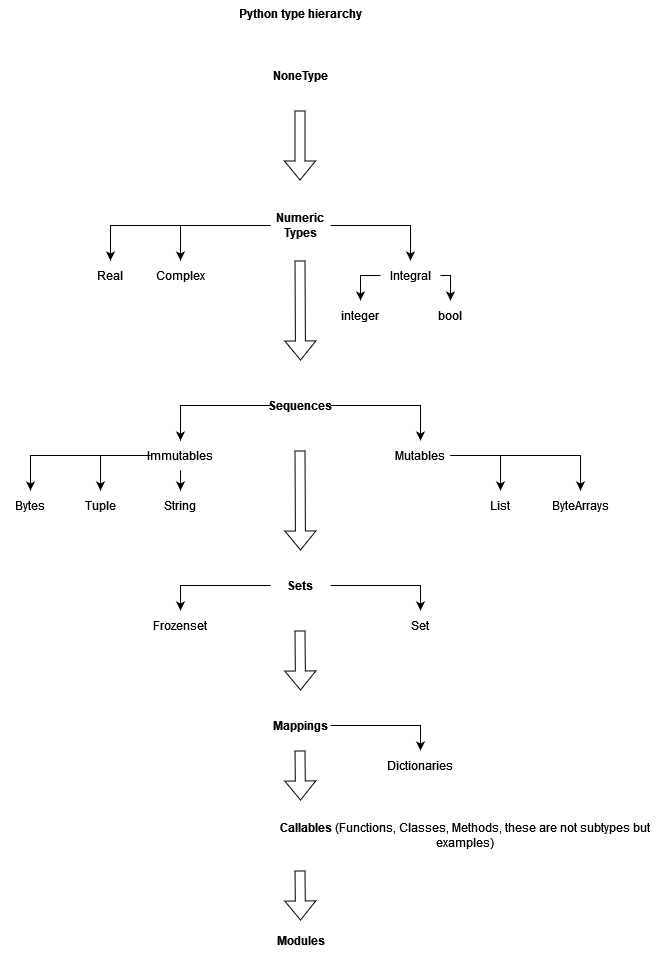    

In the above hierarchy we can see several subtypes, so is list a subtype of mutables, mutables belong to the sequence type class. Both int and bool are subtypes, from the same supertype integral, integral belongs to the numeric type class.    

The hierarchy itself are not subtypes, module is not a subtype of the NoneType. The hierarchy goes from simple to complex, with the NoneType the simplest and the module the most complex. 


#### **Liskov in  Python** 
For a Python programmer it is important to remember that create a type,  once you've created a class. An object of certain class has the type of that class. This is where the confusing between subclassing and subtyping comes from. It stands to reason to think if I create a type when I create a class, that subclassing must be the same as subtyping. Unfortuantely it isn't.

Subtyping is a form of polymorphism; inclusion polymorphism is the provision of a single interface to entities of different type. In Python you create a subtype if you implement an abstract base class, which is the Python interface. Subtyping is than also sometimes referred to as interface inheritance. 

If you get asked to implement Liskov in Python, for instance as an interview question, you should answer that you should use abstract base classes. however do realize that a Python abstract base class is insufficient to function as a contract, in the sense of Betrand Meyers design by contract, an ABC should be, to be a subtype. To be able to guarantee type you should work with a zope interface (https://github.com/zopefoundation/zope.interface) in Python. 

#### **The abstract base class ABC**
 
We will implement the model below

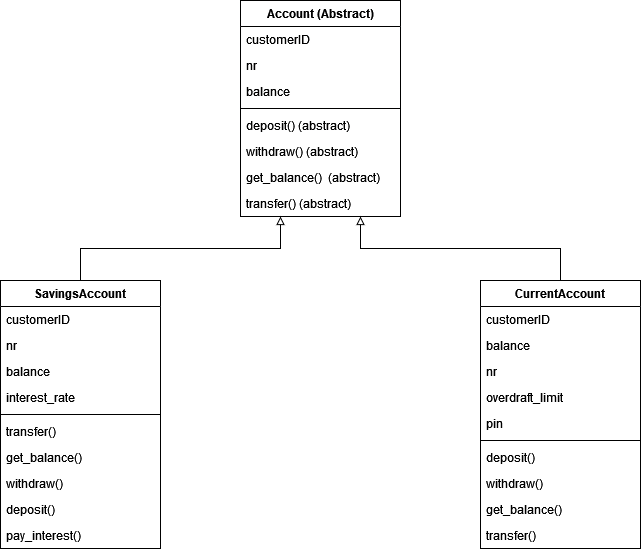

In [ ]:
from abc import ABC, abstractmethod

class Account(ABC):
    customerID:str
    nr:str
    balance:float
    
    @abstractmethod
    def deposit(self, amount:float):
        pass
    
    @abstractmethod
    def withdraw(self, amount:float):
        pass
    
    @abstractmethod
    def get_balance(self):
        pass
    
    @abstractmethod
    def transfer(self, amount:float, counter_account):
        pass


We cannot instantiate an abstract class, just like we can't instatiate a Java interface. However unlike with an ABC we can assign a value the type of an interface in Java. Well technically we can do this in Python, but the interpreter will ignore our assignment and determine the type itself.

In [ ]:
acc = Account()

In [ ]:
from dataclasses import dataclass
from typing import ClassVar 
from decimal import Decimal

@dataclass
class SavingsAccount(Account):
    '''A savingsaccount can only transfer to a fixed counter-account'''

    customerID:str
    nr:str
    counter_account:str 
    balance:float=0.0
    interest_rate:ClassVar[float]=0.0
    
    
    def deposit(self, amount:float)->None:
        self.balance += amount
    
    def withdraw(self, amount:float)->None:
        self.balance -= amount
    
    def get_balance(self)->None:
        return f'The balance of this account is {self.balance} euro.'
    
    def transfer(self, amount:float)->str:
        if self.balance >= amount:
            self.balance -= amount
            return f'the amount of {amount} euro has been transfered from your savingsaccount to {self.counter_account}'
        else:
            return f'The account with nr {self.nr} has insufficent funds for this transfer'
        
    @classmethod
    def set_interest_rate(self, rate):
        self.interest_rate = rate * 0.01
        
    def pay_interest(self)->float:
        '''period is measured in years'''
        return round(self.calculate_interest(balance=self.balance,interest_rate=self.interest_rate) - self.balance, 2)
    
    @staticmethod
    def calculate_interest(balance:float, interest_rate:float)->float:
        return balance * (1+interest_rate)

@dataclass
class CurrentAccount(Account):
    customerID:str
    nr:str
    balance:float=0.0
    pin:Decimal=Decimal('1000')
    overdraft_limit:float=0.0
    
    
    def deposit(self, amount:float)->None:
        self.balance += amount
    
    def withdraw(self, amount:float)->None:
        self.balance -= amount
    
    def get_balance(self):
        return f'The balance of this account with number {self.nr} is {self.balance} euro.'
        
    def transfer(self, amount:float, counter_account)->str:
        if self.balance + self.overdraft_limit >= amount:
            self.balance -= amount
            return f'the amount of {amount} euro has been transfered from your current account to {counter_account}'
        else:
            return f'The account with nr {self.nr} has insufficent funds for this transfer'
        
    def set_overdraft_limit(self, limit=int)->None:
        self.overdraft_limit = limit
        
    def set_pin(self, pin:Decimal)->None:
        self.pin = pin


In [ ]:
savAcc = SavingsAccount(customerID='George', nr='NL57SNSB0909009', counter_account='NL57SNSB0901111', balance=50000)
savAcc.get_balance()

In [ ]:
curAcc = CurrentAccount(customerID='Croc', nr='NL57SNSB01011010', balance=34000, overdraft_limit=10000)
curAcc

Let me create a transfer manager class that takes care of transfering money at runtime depending on the type of the account being used, and thus implement Liskov

In [ ]:
from dataclasses import dataclass

@dataclass
class TransferManager:
    account:Account=None
    
    def transfer(self, amount:float, counter_account:str)->str:
        match type(self.account).__name__:
            case 'SavingsAccount':
                return self.account.transfer(amount)
            case 'CurrentAccount':
                return self.account.transfer(amount, counter_account)
                
    

Now to use TransferManager

In [ ]:
tm1 = TransferManager(savAcc)
tm1

In [ ]:
tm1.transfer(amount=3000,counter_account='NL57SNSB01011010')

In [ ]:
tm2 = TransferManager(curAcc)
tm2

In [ ]:
tm2.transfer(amount=2700, counter_account='NL57SNSB0909009')

As you can see the transfermanager adheres to the implicit rule that a savingsaccount can only transfer to a fixed counter-account. 

#### **Subtyping and implementation inheritance are orthogonal!**
In all Python tutorials on Liskov I did read, I found a little sentence like this: "objects of a superclass shall be replaceable with objects of its subclasses without breaking the application." 

This is not true, subtyping is a specification notion. B is a subtype of A iff an object of B can masquerade as an object of A in any context, meaning that B emcompasses all of A's spec (see the catagory example). Subclassing is an inheritance notion, factoring out code repetition, to write a new class is simply adding new functionality. 

Sorry for banging on, on this but it is important to remember. For more on the subject read the paper bij Cook, Hill, and Canning https://dl.acm.org/doi/10.1145/96709.96721.

This miscomprehension leads to quite a few bad Liskov examples in Python turorials. I want to show you one that you see a lot in online tutorials

#### **The bad**

In [1]:
from abc import ABC, abstractmethod

class Notification(ABC):
    @abstractmethod
    def notify(self, message):
        pass

class Email(Notification):
    def __init__(self, email):
        self.email = email

    def notify(self, message):
        print(f'Send "{message}" to {self.email}')

class SMS(Notification):
    def __init__(self, phone):
        self.phone = phone

    def notify(self, message):
        print(f'Send "{message}" to {self.phone}')

class Contact:
    def __init__(self, name, email, phone):
        self.name = name
        self.email = email
        self.phone = phone

class NotificationManager:
    def __init__(self, notification):
        self.notification = notification

    def send(self, message):
        self.notification.notify(message)


In [ ]:
contact = Contact('John Doe', 'john@test.com', '(408)-888-9999')
sms_notification = SMS(contact.phone)
email_notification = Email(contact.email)
notification_manager = NotificationManager(sms_notification)
notification_manager.send('Hello John')

In [ ]:
notification_manager.notification = email_notification
notification_manager.send('Hi John')

OK we have a notification_manager with a constructor with as argument SMS notification `NotificationManager(sms_notification)` and we have done it like `notification_manager.notification = email_notification`. 

This is not Liskov, we do not substitute types here. I have a further specific problem with these examples. Of course it is messy code but more importantly that they cheat. To show you this we have to restart the notebook kernel and clear all outputs. Load our class again and than directly go the code below without running any other cells.

In [2]:
contact = Contact('John Doe', 'john@test.com', '(408)-888-9999')
sms_notification = SMS(contact.phone)
email_notification = Email(contact.email)
notification_manager.notification = email_notification
notification_manager.send('Hi John')

NameError: name 'notification_manager' is not defined

This code only works because Python allows you to directly access the attribute notification. In `notification_manager.notification = email_notification` we attach a new object to notificationmanager.notification, but this can only be done after we instantiated the class of course.

This has nothing to do with Liskov which is all about substituting a supertype for a subtype. What we do here is nothing more than to replace object 1 (sms_notification) for object 2 (email_notification), this is object composition and attribute assignment.

#### **Interface segregation** (I)
If Python is not the best at the Liskov Principle, Python is a natural at interface segregation. Interface segregation, states that no code should be forced to depend on methods it does not use. It simply means that larger interfaces should be split into smaller ones.

This is a natural for Python as Python knows multi-inheritance, and you could easily split larger interfaces into smaller ones and still; use multiple smaller ones if needed. 

Interfaces that implement many different methods that cater to diverse clients are called fat interfaces.    

**A fat interface**   

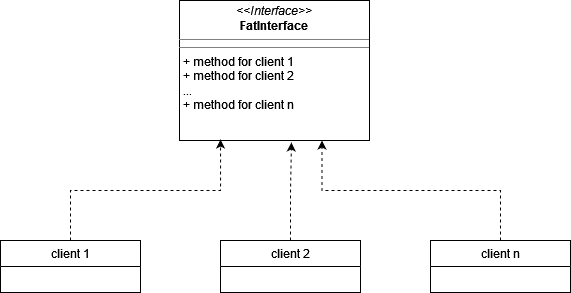

this interface has n clients implements n methods, one for each client. Let me give you a Python example of a fat (or grand) interface.

In [8]:
from abc import ABC, abstractmethod 

class RestaurantInterface(ABC):
    
    @abstractmethod
    def accept_online_order(self):
        pass
    
    @abstractmethod
    def take_telephone_order(self):
        pass
  
    @abstractmethod
    def online_payment(self):
        pass
    
    @abstractmethod
    def walkin_order(self):
        pass
    
    @abstractmethod
    def cash_payment(self):
        pass

    @abstractmethod
    def card_payment(self):
        pass

First let's think for second about this interface. There are obviously three specific clients:
 1. Online
 2. Telephone
 3. Walk-ins

There are three specific payment methods, but these methods are not all available to all clients, eg., an online client can't pay cash.

Now let's try to implement this.

In [18]:
from dataclasses import dataclass,field
from decimal import Decimal

@dataclass
class OnlineOrder(RestaurantInterface):
    client:str
    order:list[str]= field(default_factory=list)
    order_nr:Decimal=None
    price:float=0.0
    
    def accept_online_order(self)->bool:
        return True
    
    def take_telephone_order(self)->None:
        'We can`t take phone calls online'
  
    def online_payment(self)->str:
        return 'we are doing the logic to proces online payment'
    
    def walkin_order(self)->None:
        print('You can`t walk-in online')
    
    def cash_payment(self)->None:
        print('You can`t pay cash online')

    def card_payment(self)->None:
        'A card payment goes via the online payment logic'

As you can see I really only wanted to implement two of te six methods the rest I had to implement otherwise my OnlineOrder class would be an abstract class itself. Which I could not instantiate. 

Lots of clutter but our class works.

In [19]:
order = OnlineOrder(client='Croc', order=['Blue Heron','Cote du Boeuf'])
order

OnlineOrder(client='Croc', order=['Blue Heron', 'Cote du Boeuf'], order_nr=None, price=0.0)

In [20]:
order.online_payment()

'we are doing the logic to proces online payment'

Unfortunately we also can do operations that really don't belong to our class

In [21]:
order.walkin_order()

You can`t walk-in online


Now there are two ways to correct this, actually there are quite a few more, but let me focus on these two. 

Let me start with a manner Python offers you the DuckTyped interface.

In [22]:
class RestaurantInterfaceDT(ABC):
    '''This is DuckTyped inteface or informal interface'''
    
    def accept_online_order(self):
        pass
    
    def take_telephone_order(self):
        pass
  
    def online_payment(self):
        pass
    
    def walkin_order(self):
        pass
    
    def cash_payment(self):
        pass

    def card_payment(self):
        pass

In [23]:
@dataclass
class OnlineOrderTwo(RestaurantInterfaceDT):
    client:str
    order:list[str]= field(default_factory=list)
    order_nr:Decimal=None
    price:float=0.0
    
    def accept_online_order(self)->bool:
        return True
    
    def online_payment(self)->str:
        return 'we are doing the logic to proces online payment'

    

In [24]:
order_two = OnlineOrderTwo(client='Croc', order=['Blue heron', 'Cote du Boeuf','Tomahawk steak'])
order_two

OnlineOrderTwo(client='Croc', order=['Blue heron', 'Cote du Boeuf', 'Tomahawk steak'], order_nr=None, price=0.0)

In [25]:
order_two.online_payment()

'we are doing the logic to proces online payment'

I have solved the problem, well sort of anyway. 

I haven't cleaned up the interface, for instance I can still do a cash payment, it just doesn't do anything. Hopefully you understand that this is very buggy code.

In [26]:
order_two.cash_payment()

There is better way to implement this.

We seperate the interface in three interfaces that are order specific. We implement all these interfaces with ABC and abstract methods.

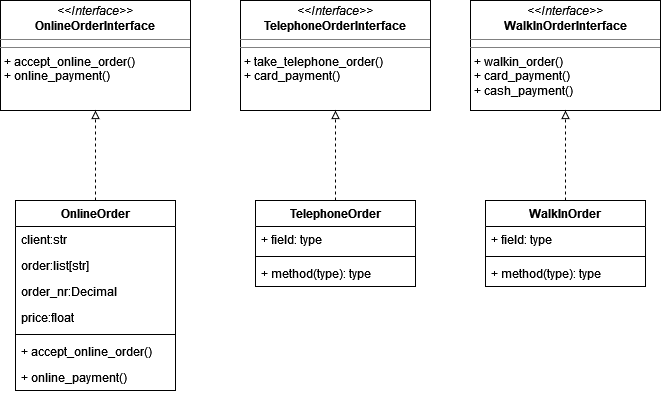

In [27]:
from abc import ABC, abstractmethod 

class OnlineOrderInterface(ABC):
    
    @abstractmethod
    def accept_online_order(self):
        pass
    
    @abstractmethod
    def online_payment(self):
        pass
    
class TelephoneOrderInterface(ABC):
    
    @abstractmethod
    def take_telephone_order(self):
        pass
    
    @abstractmethod
    def card_payment(self):
        pass
    
class WalkInOrderInterface(ABC):
    
    @abstractmethod
    def walkin_order(self):
        pass
    
    @abstractmethod
    def cash_payment(self):
        pass

    @abstractmethod
    def card_payment(self):
        pass

In [28]:
@dataclass
class OnlineOrderThree(OnlineOrderInterface):
    client:str
    order:list[str]= field(default_factory=list)
    order_nr:Decimal=None
    price:float=0.0
    
    def accept_online_order(self)->bool:
        return True
    
    def online_payment(self)->str:
        return 'we are doing the logic to proces online payment'

In [29]:
order_three = OnlineOrderThree(client='Croc', order=['Blue heron', 'Cote du Boeuf','Tomahawk steak', 'Leg of Lamb'])
order_three

OnlineOrderThree(client='Croc', order=['Blue heron', 'Cote du Boeuf', 'Tomahawk steak', 'Leg of Lamb'], order_nr=None, price=0.0)

In [30]:
order_three.online_payment()

'we are doing the logic to proces online payment'

This is a much better solution for I have only to implement the methods that are applicable to me. 

However, I had to repeat some implementations across the interfaces `card_payment(self):` occurs twice. 

This is code-repetition, we want to avoid it where possible. And as I stated we can do better, especially in Python.

#### **Mixin solution**
We could use a Mixin class, to solve the problem, as I do not think order should contain the logic for processing payments. That should be a payment class.

Our diagram would like:

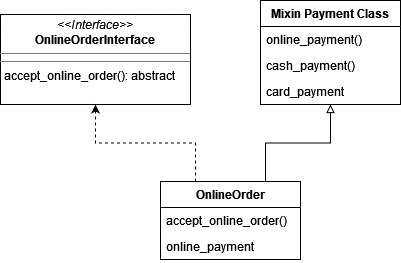

In [31]:
from abc import ABC, abstractmethod 

class OnlineOrderInterfaceII(ABC):
    
    @abstractmethod
    def accept_online_order(self):
        pass
    
class MixinPaymentClass:
    
    def online_payment(self)->str:
        return f'we are facilitating {type(self).__name__}`s online payment'
    
    def cash_payment(self)->str:
        return f'we are facilitating {type(self).__name__}`s cash payment'
    
    def card_payment(self)->str:
        return f'we are facilitating {type(self).__name__}`s card payment'
    

@dataclass
class OnlineOrderFour(OnlineOrderInterfaceII, MixinPaymentClass):
    client:str
    order:list[str]= field(default_factory=list)
    order_nr:Decimal=None
    price:float=0.0
    
    def accept_online_order(self)->bool:
        return True
    
    def online_payment(self)->str:
        return super().online_payment()
    
    def cash_payment(self)->str:
        return f'unfortunately {type(self).__name__} does not accept cash payments'
    
    def card_payment(self)->str:
        return f'unfortunately {type(self).__name__} does not accept card payments'
        
    
    

In [32]:
order_four = OnlineOrderFour(client='Croc', order=['Blue heron', 'Cote du Boeuf','Tomahawk steak', 'Leg of Lamb', 'roasted suckling pig'])
order_four

OnlineOrderFour(client='Croc', order=['Blue heron', 'Cote du Boeuf', 'Tomahawk steak', 'Leg of Lamb', 'roasted suckling pig'], order_nr=None, price=0.0)

In [33]:
order_four.online_payment()

'we are facilitating OnlineOrderFour`s online payment'

Of course we should implement the other methods to avoid bugs

In [34]:
order_four.cash_payment()

'unfortunately OnlineOrderFour does not accept cash payments'

The GoF favoured object composition over inheritance. Here I feel that object composition is the better solution.

In [39]:
class PaymentClass:
    
    def online_payment(self)->str:
        return f'we are facilitating {type(self).__name__}`s online payment'
    
    def cash_payment(self)->str:
        return f'we are facilitating {type(self).__name__}`s cash payment'
    
    def card_payment(self)->str:
        return f'we are facilitating {type(self).__name__}`s card payment'

In [40]:
from abc import ABC, abstractmethod 

class OnlineOrderInterfaceII(ABC):
    
    @abstractmethod
    def accept_online_order(self):
        pass
    
@dataclass
class OnlineOrderFive(OnlineOrderInterfaceII):
    client:str
    order:list[str]= field(default_factory=list)
    order_nr:Decimal=None
    price:float=0.0
    
    def accept_online_order(self)->bool:
        return True
    
    def online_payment(self)->str:
        return PaymentClass().online_payment()
    

In [37]:
order_five = OnlineOrderFive(client='Croc', order=['Blue heron', 'Cote du Boeuf','Tomahawk steak', 'Leg of Lamb', 'roasted suckling pig', 'Veal Orloff'])
order_five

OnlineOrderFive(client='Croc', order=['Blue heron', 'Cote du Boeuf', 'Tomahawk steak', 'Leg of Lamb', 'roasted suckling pig', 'Veal Orloff'], order_nr=None, price=0.0)

In [38]:
order_five.online_payment()

'we are facilitating PaymentClass`s online payment'

The last solution is obviously the best, we did avoid the need to implement useless methods in our class.

We traded our parent dependency for a direct dependency on another class, but still, we don't care about the implementation. 

Now I am working in an interactive environment usually you would just import the PaymentClass. We also simplified the responsibility of our class and gave over the payment responsibility to a specialized PaymentClass, which can be expanded with numerous payment methods without us needing to change the interface or the `OnlineOrderFive` class.

There is another option see if you can think of that, maybe first read on.
   

#### **Dependency inversion principle** (D)
The principle of dependency inversion refers to the decoupling of software modules. This way, instead of high-level modules depending on low-level modules, both will depend on abstractions.

This diagram gives a clear view of DIP.

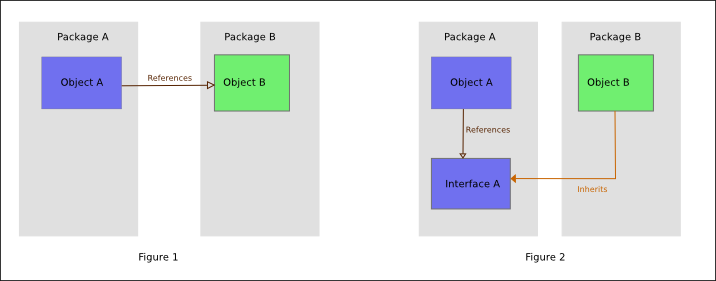!

Simply put, DIP is about making software components to explicitly declare their dependencies or collaborators through their APIs, 
instead of acquiring them by themselves.

Bob Martin says dependency inversion is about: High-level modules should not depend on low-level modules. Both should depend on abstractions; abstractions should not depend on details. Details should depend on abstractions.

However, I believe that this doesn't make much clearer. Dependency inversion is all about API's. It is about high-level modules interoperate with medium and low-level modules. This is not Bob Martins idea; it comes from one of the first object-oriented languages called Smalltalk.

Let's see a Pythonic way of implementing DIP You should recognize the code.

In [41]:
from abc import ABC, abstractmethod
from dataclasses import dataclass

class CurrencyConverter(ABC):
    '''This the interface that the client class will use, there are no details here''' 
    
    @abstractmethod
    def convert(self, from_currency, to_currency, amount) -> float:
        raise NotImplementedError("You need to implement this.")


@dataclass
class FXConverter(CurrencyConverter):
    '''this a low level module that implements the conversion in a detailed manner'''
    
    def convert(self, from_currency, to_currency, amount) -> float:
        print(f'using the {type(self).__name__} converter')
        print(f'{amount} {from_currency} = {amount * 1.2} {to_currency}')
        return amount * 1.15


@dataclass
class AlphaConverter(CurrencyConverter):
    '''this a low level module that implements the conversion in a detailed manner'''
    
    def convert(self, from_currency, to_currency, amount) -> float:
        print(f'using the {type(self).__name__} converter')
        print(f'{amount} {from_currency} = {amount * 1.2} {to_currency}')
        return amount * 1.2

@dataclass
class Client:
    converter:CurrencyConverter=None

    def start(self):
        self.converter.convert('EUR', 'USD', 100)


In [42]:
client = Client(AlphaConverter())
client.start()

using the AlphaConverter converter
100 EUR = 120.0 USD


To understand what happens see the following diagram:

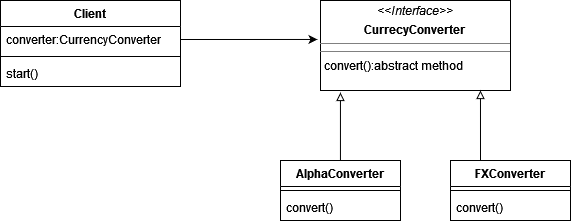

The client has an attribute called converter of type CurrencyConverter. CurrencyConverter is an interface, both AlpaConverter and FXConverter implement that interface. When we instantiate `client = Client(AlphaConverter())` we give it an AlphaConverter (this is Liskov in prima forma, as AlphaConverter is a subtype of CurrencyConverter, also we use 1 of the 3 forms of dependency injection here, on which more later.)

The thing to notice is that there is a barrier between Client and the actual classes (AlphaConverter, FXConverter) that implement `convert()` Some of the most famous programming patterns follow this general pattern, for instance the Adapter Pattern see https://en.wikipedia.org/wiki/Adapter_pattern.

#### **Dependency injection**
You often hear dependency inversion said in the same sentence as dependency injection. What is dependency injection? Dependency injection is a design pattern in which an object or function receives other objects or functions that it depends on. A form of inversion of control, dependency injection aims to separate the concerns of constructing objects and using them.

Most of the dependency injection is done by a framework, as manual dependency injection is rather tedious. There are several famous frameworks that use dependency injection. The most famous being Spring for Java, domain specific frameworks are for instance AngularJS for JavaScript and Django for Python.    

The advantages of dependency injection are that it leads to loosely coupled programs, which we have seen is a software quality. Furthermore, there are advantages in unit testing, as the code behaviour does not change, dependency injection allows for testing in isolation, aka unit testing.   

However, dependency injection also leads invariably to a lot of mocking, which in turn come with the following cost:

 1. Using mocks leads to violations of the DRY principle.
 2. Using mocks makes refactoring harder.
 3. Using mocks can reduce the simplicity of the design. 

Unfortunately, there are more disadvantages you should consider: 
 * dependence on frameworks. 
 * code is difficult to trace, and therefore more difficult to understand.

Let me show you some simple examples of dependency injection.


#### **Three ways to inject dependencies**
 1. constructor injection
 2. setter injection
 3. Interface injection

In [1]:
class Service:
    '''this is some service you want'''
    pass

class Client:

    def __init__(self): 
        #This dependency is hard-coded this class is tightly coupled.
        self.service = Service()

**1 Constructor injection**

Create a depency at initialization.

In [45]:
class Client:
    '''This is loosely coupled because the constructor takes a service'''
    
    def __init__(self, service:Service)->None: 
        if service is None:
            raise 'The service should not be None'
        self.service = service 

#### **2 Setter injection**
Basically the same as above, but now we use a setter, instead of initializing the variable.

In [27]:
class Client:
    '''This is loosely coupled because the setter injects a service'''
    
    def set_service(self, service:Service)->None:
        if service is None:
            raise 'The service should not be None'
        self.service = service

#### **3 Interface Injection**
Interface injection is the most common form of injection. Dependents are completely ignorant of their clients, yet still send and receive references to new clients.

That this is important might be difficult to understand for a programmer that develops small systems. The essence boils down to this: you should not create a dependency between two object that work together but don't necessarily belong together.  

A simple example is of course a brake, a car has a brake, but so do a motorbike, a bicycle, and even an elevator has a brake. It does not make sense to hardwire the car and the brake together as this might mean your brake is too specific to be of use for the other objects. 

You could use interface dependency injection to solve this issue.

In [2]:
from abc import ABC, abstractmethod

class BrakeInterface(ABC):
    
    @abstractmethod
    def brake_on(sender)->None:
        ...
    
    @abstractmethod
    def brake_off(sender)->None:
        ...
        
class Car(BrakeInterface):
    
    def __init__(self)->None:
        self.brake = False
        
    def brake_on(self, sender)->None:
        self.brake = True
        print(f'{self.__class__.__name__} is braking')
    
    def brake_off(self, sender)->None:
        self.brake = False
        print(f'{self.__class__.__name__} is braking')

class Elevator(BrakeInterface):
    
    def __init__(self)->None:
        self.brake = False
        
    def brake_on(self, sender)->None:
        self.brake = True
        print(f'{sender.__class__.__name__} is braking')
    
    def brake_off(self, sender)->None:
        self.brake = False
        print(f'{sender.__class__.__name__} is braking')
    

class Brake:
    
    def __init__(self, outlet):          
        self.status = None                
        self.outlet = outlet 
    
    def braking(self):
        if not self.status:
            self.status = True
            self.outlet.brake_on(sender=self)
    
    def not_braking(self):
        if self.status:
            self.status = False
            self.outlet.brake_on(sender=self)        
    
    

The above you would use in a main as such:

In [3]:
car = Car()
brake = Brake(car)
brake.braking()

Car is braking


In [30]:
elevator = Elevator()
brake2 = Brake(elevator)
brake2.braking()

Brake is braking


As you can see both objects use the brake object. 

The brake object does not care what object it receives, iff it adheres to the BrakeInterface. 

This is very like the strategy pattern see https://en.wikipedia.org/wiki/Strategy_pattern, and very much like the factory pattern see https://en.wikipedia.org/wiki/Factory_(object-oriented_programming).

As far as I am aware dependency injection is not a massive thing in dynamic languages like Python, which are flexible in nature, unlike C++ or Java. There are other solutions. See Raymond Hettinger's video https://www.youtube.com/watch?v=EiOglTERPEo. 

Or in a pinch you could use **monkey-patching**, which is to dynamically change the behaviour of code at runtime.

In [4]:
import math

print(math.pi)


3.141592653589793


In [5]:
# the monkey-patch
math.pi = 100
print(math.pi)

100


I would advice against monkey-patching, but am a fan of the code Hettinger shows, which I feel is more Pythonic than dependency injection.

However, if you want to use dependency injection, it seems a framework is the way to go see https://python-dependency-injector.ets-labs.org/.

## **The Ugly**
Now we have talked about SOLID in quite some detail, we need to talk about the ugly with SOLID. SOLID leads to a lot of abstraction via the use of interfaces as you can see from the last example. Unfortunately to a lot of dependencies too. This is of course dependent :-) on your definition of dependency. In the broadest sense it is a form of association, but dependency is stronger in object composition than in inheritance. The reason for this is simple you can ignore the parents’ implementations (you can override them), you cannot ignore the implementation of the objects your object is composed off. 

Because you cannot ignore the implementations of objects in composition is the reason for the application programming interface. The API provides you with at minimal a signature for the object and hopefully some added documentation. So, you know what to expect without needing to care how such is achieved in the actual code of the object. 

SOLID leads to dependencies for it favours composition over inheritance, but inheritance is also a dependency. Now if you're confused it is maybe time to look at the benefits of functional programming ;-) 

I am not sure SOLID is an important thing in the Netherlands, I would suggest that the GRASP principles are more used. https://en.wikipedia.org/wiki/GRASP_(object-oriented_design), but I was raised with GRASP so I might very well be wrong. The Dutch wiki page for SOLID is however quite light :-) see https://nl.wikipedia.org/wiki/SOLID. 

Using SOLID or GRASP will inevitably lead to code-bloat, meaning you will pump up your code base with a lot of boiler plate code, and your code base might become very opaque and exceedingly difficult to test.

#### **Mocking**
Hopefully you have seen that next to solving some design issues, the SOLID principles lead to your code base growing substantially and increasing dependencies. Dependencies are difficult to test, you need not only to unit test the classes, but you also need to test the dependencies. This leads inevitably to a lot of mocking. With mocking I mean you need to create objects that simulate the behaviour of real objects to test the behaviour of the dependencies. After all you might not have written the other class, or it might not exist at all yet.

*'Mocks are a smell. They tell you that your code depends on some semi-related part of the system. Rather than work around the design defect, fix the design.'* 

Good advice! see this interesting blogpost http://arlobelshee.com/tag/no-mocks/ for more information.

#### **Dependency elimination**
The good in SOLID is foremost in the Single Responsibility Principle. The other principles tend to lead to added dependencies. But if you decide to (loosely I hope) follow SOLID you need to extra care of your dependencies, in fact you should treat dependencies as code smells. Why, simply because dependencies are inherently buggy and harder to test.

But how do I eliminate dependencies especially in Python?
 1. Following the SRP principle, meaning that the responsibility of changing a class lies with one actor. One dependency, The software quality principles low coupling and high cohesion will help you to clean your code up. 
 2. Consider the testability of what you are writing, in order from easy to difficult:
    * A pure (mathematical) function, meaning no side effects.
    * A class that has immutable state.
    * A class that has mutable state but has no dependencies with behaviour (no parent not depending on other objects).
    * A class that operates against a dependency with its own behaviour.
 3. Use immutable data where possible, otherwise make it possible in your design.
 4. Favour object composition over inheritance if you want to do SOLID see https://en.wikipedia.org/wiki/Composition_over_inheritance. Favour inheritance if you want to be more Pythonic.
 5. Treat dependencies as code smells. 

I just want to expound on point five for point four see the Inheritance notebook.

#### **This code stinks!**
Treat dependecies as code smell, consider the following code:

In [9]:
from abc import ABC, abstractmethod
from dataclasses import dataclass, field

class Order:
    
    def __init__(self)->None:
        self.state = 'unpaid'

class PaymentProcessor(ABC):

    @abstractmethod
    def pay(self, order:Order, verification_method:str)->None:
        raise NotImplementedError("You need to implement this.")

class DebitPaymentProcessor(PaymentProcessor):
    
    def pay(self, order:Order, verification_method:str)->None:
        print(f"Using pin code: {verification_method}")         
        order.state = 'paid'

class CreditPaymentProcessor(PaymentProcessor):
    
    def pay(self, order:Order, verification_method:str)->None:
        print(f"Using pin code: {verification_method}")         
        order.state = 'paid'

class PaypalPaymentProcessor(PaymentProcessor):
    
    def pay(self, order:Order, verification_method:str)->None:
        print(f"Using email-address: {verification_method}")         
        order.state = 'paid'

@dataclass
class Order:
    #attributen
    items:list[str] = field(default_factory=list)
    quantities:list[int] = field(default_factory=list)
    prices:list[float] = field(default_factory=list)
    state:str = "open"
    total:float = 0.0

    #methodes
    def add_item_to_order(self, name, quantity, price)->None:
        self.items.append(name)
        self.quantities.append(quantity)
        self.prices.append(price)

    def calculate_sum_of_items(self)->None:
        total = 0
        for i in range(len(self.prices)):
            total += self.quantities[i] * self.prices[i]
        self.total = total         
        

#### In a diagram
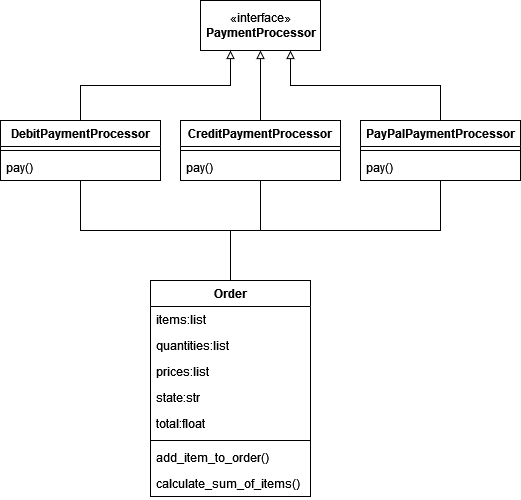


As we can see there is a lot of dependency here. Three classes are depending on order and four classes are responsible for Order!
What creates this dependency let's have a look at the implementation of pay: 

` def pay(self, order:Order, verification_method:str)->None:`
         
We take an order as argument. If you see a method taking an object as an argument, all the stink alarms need to go off. Your first question should be does a PaymentProcessor.pay() need an order to process payment? The answer is of course no, it needs an amount to process the payment, `order.total` perhaps?

As a guideline you should always try to use low level types as arguments to methods and functions, not compounded types as objects. There are exceptions to this of course, but these are rare.

By giving it an object, we create a dependency to that object, if I want to change something in that object, for instance I want order.state to be a Boolean, I now must change all PaymentProcessor classes...

In general, you should try to avoid accessing attributes directly from outside of the object itself, for this is cause of probably the most errors in Python. This code isn't following the SRP guideline, both Order and all the PaymentProcessor classes are now responsible for changing order. That is four actors when we only should have one!

People change the attributes of objects for their own reasons, without realizing that others depend on this. Having four different classes responsible for changing order makes it difficult to trace who changed it! These types of errors are near to impossible to test (especially while only using unit testing, you would need regression  and dependency testing, but no guarantees that you would actually find the root cause. They're near to impossible to debug in large systems, with a large code base.

It is better to use a setter for that and make explicit what you are doing and maybe log it. Better still make your object immutable, recreate the changed object and delete the old one.

Furthermore, by giving the PaymentProcesser classes access to the order I gave it significantly more information that it needed. I gave it access to five attributes, but it only needed one. This is not information hiding (one of the reasons for objected oriented programming). 

This code is tightly coupled it should be loosely coupled. 

There is another question which is not solved by SOLID, and that question is who creates a payment? Is it a PaymentProcessor class or is it Order in this simple example? It is Order that needs to be paid, and in this simple diagram it is the job of order to create a payment, and for the PaymentProcessor classes to process that payment (GRASP would make this clear).

We can redesign this.

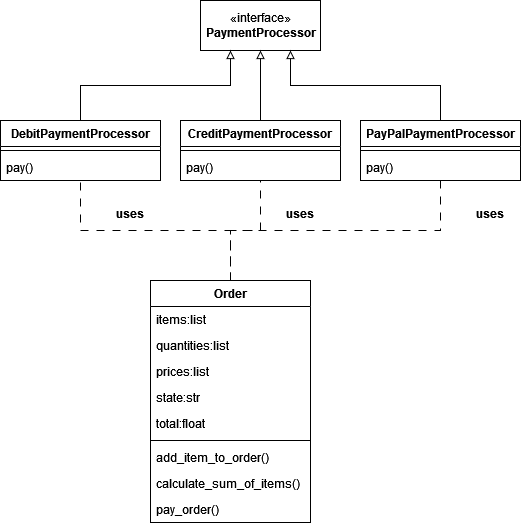

Now order uses the PaymentProcessor classes without creating a dependency. The implementation of the different pay methods might change, there won't be a need to change order if you keep the methods signature the same.


In [16]:
from abc import ABC, abstractmethod
from dataclasses import dataclass, field

class PaymentProcessor(ABC):

    @abstractmethod
    def pay(self, total, verification_method)->bool:
        raise NotImplementedError("You need to implement this.")


class DebitPaymentProcessor(PaymentProcessor):
    
    def pay(self, total:float, verification_method:str)->bool:
        print(f"Using pin code: {verification_method}")         
        return True

class CreditPaymentProcessor(PaymentProcessor):
    
    def pay(self, total:float, verification_method:str)->bool:
        print(f"Using pin code: {verification_method}")         
        return True

class PaypalPaymentProcessor(PaymentProcessor):
    
    def pay(self, total:float, verification_method:str)->bool:
        print(f"Using email-address: {verification_method}")         
        return True
 
 
@dataclass(frozen=False)
class Order:
    items:list[str] = field(default_factory=list)
    quantities:list[int] = field(default_factory=list)
    prices:list[float] = field(default_factory=list)
    state:str = "open"
    total:float = 0.0

    def add_item_to_order(self, name, quantity, price)->None:
        self.items.append(name)
        self.quantities.append(quantity)
        self.prices.append(price)

    def calculate_sum_of_items(self)->None:
        total = 0
        for i in range(len(self.prices)):
            total += self.quantities[i] * self.prices[i]
        self.total = total

    def pay_order(self, payment_processor:PaymentProcessor, verification_method)->None: # we do Liskov here
        if payment_processor.pay(self.total, verification_method):
            self.state = 'paid'
        else:
            self.state = 'open'

In [17]:
order = Order()
order.add_item_to_order("Spaghetti", 1, 50)
order.add_item_to_order("Monitor", 1, 150)

In [18]:
order.calculate_sum_of_items()
print(order.total)

200


In [19]:
order.state

'open'

In [20]:
order.pay_order(PaypalPaymentProcessor(), 'hoi@ikbener.nl') 

Using email-address: hoi@ikbener.nl


In [21]:
order.state

'paid'

This code smells fresher, but the stink alarm still goes off.  
Pay_order(self, payment_processor:PaymentProcessor, verification_method) still takes an object. This code could use one more refactoring. 

Instead of telling `order.pay_order()` the PaymentProcessing class used. I want to abstract that, Order is only concerned with a payment method, not with the actual class and certainly not its implementation.

We should build an interface and let Python decide at runtime which class to use, based on the information it receives. 

The diagram would look like this. 

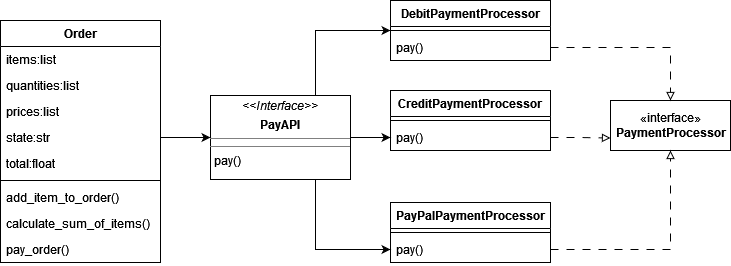

In [22]:
from abc import ABC, abstractmethod
from dataclasses import dataclass, field

class PaymentProcessor(ABC):

    @abstractmethod
    def pay(self, total, verification_method)->bool:
        raise NotImplementedError("You need to implement this.")

class DebitPaymentProcessor(PaymentProcessor):
    def pay(self, total, verification_method)->bool:
        print(f"Using pin code: {verification_method}")         
        return True

class CreditPaymentProcessor(PaymentProcessor):
    
    def pay(self, total:float, verification_method:str)->bool:
        print(f"Using pin code: {verification_method}")         
        return True

class PaypalPaymentProcessor(PaymentProcessor):
    
    def pay(self, total:float, verification_method:str)->bool:
        print(f"Using email-address: {verification_method}")         
        return True

@dataclass
class Order:
    items:list[str] = field(default_factory=list)
    quantities:list[int] = field(default_factory=list)
    prices:list[float] = field(default_factory=list)
    state:str = "open"
    total:float = 0.0

    def add_item_to_order(self, name, quantity, price)->None:
        self.items.append(name)
        self.quantities.append(quantity)
        self.prices.append(price)

    def calculate_sum_of_items(self)->None:
        self.total = round(sum([quantity * price for quantity in self.quantities for price in self.prices ])/2,2)

    def pay_order(self, payment_method:str, verification_method:str)->None: # we do Liskov here
        if PayAPI().pay(self.total, payment_method, verification_method):
            self.state = 'paid'
        else:
            self.state = 'open'

class PayAPI:
    
    def pay(self,amount:float,payment_method:str,verification_method:str):
        match payment_method:
            case 'debit':
                return DebitPaymentProcessor().pay(total=amount, verification_method=verification_method)
            case 'credit':
                return CreditPaymentProcessor().pay(total=amount, verification_method=verification_method)
            case 'paypal':
                return PaypalPaymentProcessor().pay(total=amount, verification_method=verification_method)
            case other:
                print('We do not accept this payment method')
                return False                

I have two options here, the first is to create a hierarchy by letting order inherit PayApi.

Though this would be a valid choice, I like to just use PayApi.pay as a helper and prefer to use it as an external method. This keeps the MRO DAG from bloating (in real-life you would simply import it).

I made two other changes in the code I insisted that verification_methode is a string, why? I can represent the pin code 0001 as a string '0001', but I can't as a numerical value, there 0001 and 1 would be the same. I changed `calculate_sum_of_items()` too as I don't like frivolous for-loops which are easy to break and used a comprehension instead. 

In [36]:
order = Order()
order.add_item_to_order("Spaghetti", 1, 50)
order.add_item_to_order("Monitor", 1, 150)

In [37]:
order.calculate_sum_of_items()
print(order.total)

200.0


In [38]:
order.state

'open'

In [39]:
order.pay_order('debit', '0101')

Using pin code: 0101


In [40]:
order.state

'paid'

In [41]:
order2 = Order()
order2.add_item_to_order("Blue Heron", 5, 75.30)
order2.add_item_to_order("Cote du boeuf", 4, 56.37)
order2.calculate_sum_of_items()
print(order2.total)

592.51


In [42]:
order2.state

'open'

In [43]:
order2.pay_order('paypal', 'croc@peckish.com')

Using email-address: croc@peckish.com


In [44]:
order3 = Order()
order3.add_item_to_order('Milk', 1, 1.36)
order3.add_item_to_order('Hopjes vla', 2, 1.18)
order3.calculate_sum_of_items()
print(order3.total)

3.81


In [45]:
order3.pay_order('cash', '10 euro')

We do not accept this payment method


In [46]:
order3.state

'open'

In [47]:
order3.pay_order('credit', '00000')

Using pin code: 00000


In [48]:
order.state

'paid'

#### **A final word**
There is a lot to learn about programming design. If you program in OO than you need to fastidiously design your program and the (critical) use of SOLID and GRASP will surely help you a lot. Another lesson is perhaps that OO isn't the end all of programming the functional paradigm is equally as good, better I would suggest. Unfortunately, you can't do any actual Functional Programming in Python, and that will never happen if you believe Guido van Rossum. As Guido is Python's benevolent dictator, I guess we should.

#### **The End**